In [2]:
from IPython import display
import time
from matplotlib.pyplot import imshow, show, pause
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import random
from math import sqrt
from numpy.random import rand
import scipy.stats as stats
import itertools


def get_unique_neighbors(neighbors):
    
    flattened = list(itertools.chain(*neighbors))
    
    unique_neighbors = list(set(flattened))

    return unique_neighbors

# given a matrix, find the neighboring cells
# this function wraps around the borders, so that agents on the right border of the 
# matrix are neighbors with agents on the left border, and the top row is next to
# the bottom row

def get_wrapping_neighbor_indices(matrix, i , j):
    neighbors = []

    # for all neighbouring i and j, but not for matrix[i][j]
    # i should not be negative or exceed the total row numbers
    # j should not be negative or exceed the total column numbers
    for row in [i-1, i, i+1]:
        if row >= matrix.shape[0]:
            row -= matrix.shape[0]
        elif row < 0:
            row += matrix.shape[0]
        for col in [j-1, j, j+1]:
            if col >= matrix.shape[0]:
                col -= matrix.shape[0]
            elif col < 0:
                col += matrix.shape[0]
            
            if not (row == i and col == j):
                neighbors.append((row, col))

    return neighbors

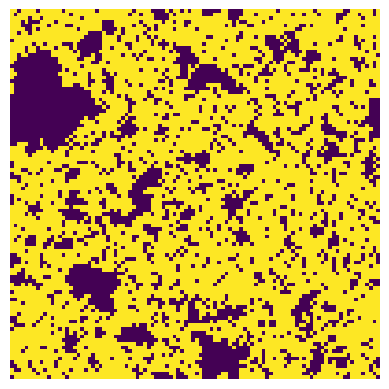

In [6]:
# let's just define one side of the square, so we don't have to worry about square roots
side = 100

# initialise an empty array with the population size being side * side
SIR = np.zeros((side, side))

# first infection: randomly assign a patient 0
SIR[randint(0, side-1), randint(0, side-1)] = 1  

# show this grid
im = plt.imshow(SIR)
plt.axis('off')

sharing_p = 0.30 

# while there is at least one active infection, the infection  keeps going
while 1 in SIR: 

    # get neighbors of infected person

    # initialise empty list to store the neighbors
    neighbors = []

    # get the index of the infected person 
    infected = np.where(SIR == 1) 

    # for each infected agent, get their neighbours and append them to the list 
    for i, j in zip(infected[0], infected[1]):
        neighbors.append(get_wrapping_neighbor_indices(SIR, i,j))

    # we only need to keep the ones
    neighbors = get_unique_neighbors(neighbors)
    
    # Keep only those who are susceptible, i.e. whose value is 0

    infected = np.where(SIR == 1) #index of infected person 

    # Keep only those who are susceptible, i.e. whose value is 0

    susceptible_neighbors = np.array([n for n in neighbors if SIR[n] == 0])

    # determine which ones will be infected with sharing_probability 
    actually_infected = stats.bernoulli.rvs(sharing_p, size=len(susceptible_neighbors))
    
    # convert this into a boolean mask of FALSE/TRUE values
    actually_infected = np.array(actually_infected).astype(bool)

    # impose boolean mask on the susceptible_neighbors to get the indices
    # of the neighbors who will ACTUALLY be infected
    new_infections = susceptible_neighbors[actually_infected]

    # those who were already infected recover (2)
    SIR[np.nonzero(SIR == 1)] = 2

    # the newly infected become infectious (1)
    for i in new_infections:
        SIR[i[0],i[1]] = 1

    # update and show figure
    im.set_data(SIR)
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # pause for a split second 
    time.sleep(0.1)
    

In [4]:
# let's see how many people were infected in total in this round
print(f'in this cascade, {len(np.where(SIR == 2)[0])} people were infected \nthat is {len(np.where(SIR == 2)[0])/(side*side)*100:.2f}% of the entire population')

in this cascade, 7618 people were infected 
that is 76.18% of the entire population


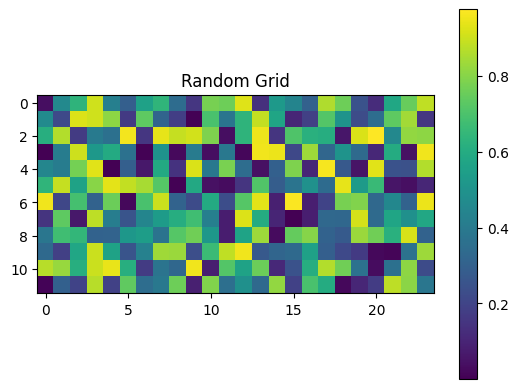

In [5]:
# Initialize the grid with random numbers between 0 and 1
grid = np.random.rand(12, 24)

# Plot a numpy array as a grid 
plt.imshow(grid, cmap='viridis')
plt.colorbar()
plt.title('Random Grid')
plt.show()
